In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

plt.rcParams["figure.figsize"] = (5, 4)

In [2]:
def michaelis_menten_dynamic_system(S_0, X_0, V_max, K_M, mu, max_t, dt=0.1):
    time = np.arange(0, max_t, dt)
    trajectory = np.zeros((time.size, 2))

    s = S_0
    x = X_0
    for i, t in enumerate(time):
        trajectory[i, :] = [s, x]

        x = X_0 * np.exp(mu * t)
        dS = V_max * (s / (K_M + s)) * x

        s += dS * dt

    return np.array(time), np.array(trajectory)

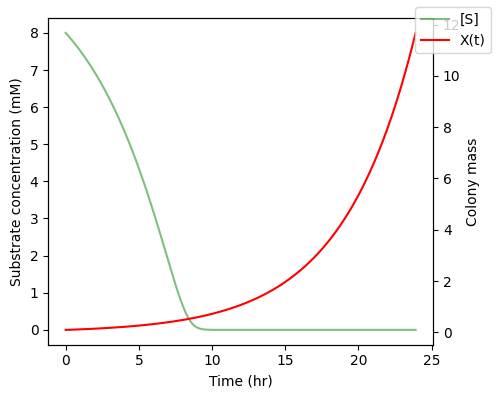

In [3]:
t, x = michaelis_menten_dynamic_system(8, 0.1, -5, 1, .2, 24)
S_total = np.trapz(x[:, 0], t, dx=0.1)

fig, ax = plt.subplots()
ax.plot(t, x[:, 0], color="g", alpha=0.5, label=f"[S]")
ax.set_xlabel("Time (hr)")
ax.set_ylabel("Substrate concentration (mM)")
ax2 = ax.twinx()
ax2.plot(t, x[:, 1], color="r", label="X(t)")
ax2.set_ylabel("Colony mass")

fig.legend()
fig.tight_layout()

In [4]:
def fit_M_M_for_given_K_M(S_0, X_0, S_final, K_M, mu, max_t, dt=0.1):
    result = minimize(
        (
            lambda v_max: (
                S_final -
                michaelis_menten_dynamic_system(
                    S_0, X_0, v_max, K_M, mu, max_t)[1][-1, 0]
            )**2
        ),
        [1])
    return result


/tmp/ipykernel_6250/1768034879.py:8: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  trajectory[i, :] = [s, x]


Text(0, 0.5, 'Optimal $V_{max}$')

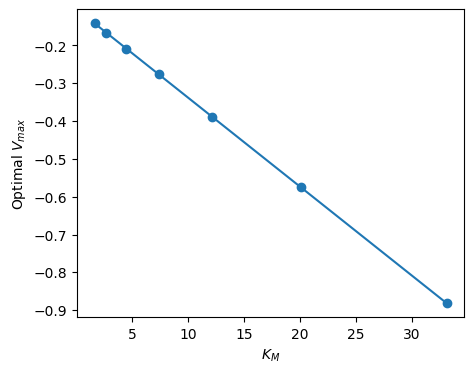

In [5]:
t, x = michaelis_menten_dynamic_system(8, 0.1, -5, 1, .2, 24)

KM = np.exp(np.arange(0.5, 4, 0.5))
vmax = []
for km in KM:
    opt_result = fit_M_M_for_given_K_M(8, 0.1, 2, km, .2, 24)
    vmax.append(opt_result.x[0])

fig, ax = plt.subplots()
ax.plot(KM, vmax)
ax.scatter(KM, vmax)
ax.set_xlabel("$K_M$")
ax.set_ylabel("Optimal $V_{max}$")


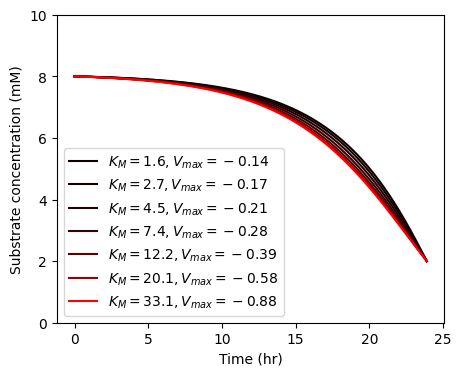

In [6]:
fig, ax = plt.subplots()

for km, vm in zip(KM, vmax):
    t, x = michaelis_menten_dynamic_system(8, .1, vm, km, .2, 24)
    
    ax.plot(t, x[:,0], color=(km/KM.max(), 0, 0), label=f"$K_M={km:.1f}, V_{{max}}={vm:.2f}$")
    ax.set_ylim(0, 10)

ax.set_xlabel("Time (hr)")
ax.set_ylabel("Substrate concentration (mM)")
ax.legend()